In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
import scipy 

from library.sb_utils import save_file

In [15]:
df = pd.read_csv('../train.csv')

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
print(df.shape)
df.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

### Figure 1 - Counts by Sale Price

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


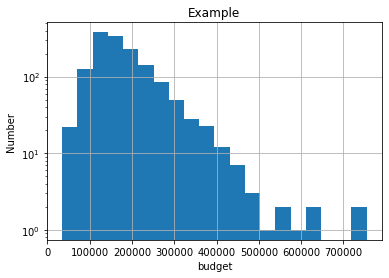

In [18]:
ax = df['SalePrice'].hist(bins=20)
ax.set_yscale('log')
ax.set_ylabel('Number ')
ax.set_xlabel('budget')
ax.set_title('Example')
pd.DataFrame(df['SalePrice'].describe())

### Figure 2 - Correlation - LotArea and SalePrice

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


correlation : (0.2638433538714057, 1.1231391549193063e-24)


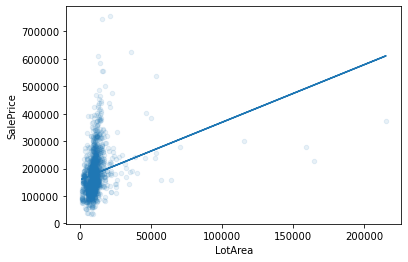

In [19]:
# regress "expression" onto "motifScore" (plus an intercept)
model = sm.OLS(df.SalePrice, sm.add_constant(df.LotArea))
p = model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df.LotArea
# scatter-plot data
ax = df.plot(x='LotArea', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p.LotArea * x)
print ("correlation :",scipy.stats.pearsonr(df.SalePrice, df.LotArea) )

### Figure 3 - Box Plot - SalePrice grouped by HouseStyle

,mean,std
HouseStyle,,
1.5Fin,143116.740260,54277.941119
1.5Unf,110150.000000,19036.473090
1Story,175985.477961,77055.715011
2.5Fin,220000.000000,118211.976671
2.5Unf,157354.545455,63934.128032
2Story,210051.764045,87339.213570
SFoyer,135074.486486,30480.898192
SLvl,166703.384615,38305.161339


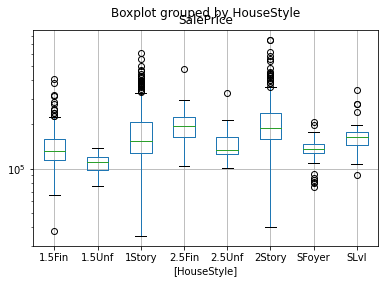

In [20]:
df.boxplot(column=['SalePrice'],by = ['HouseStyle']).set_yscale('log')
pd.DataFrame(df.groupby( ['HouseStyle'])['SalePrice'].describe().loc[:,['mean','std']])

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


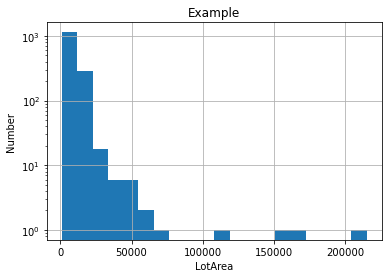

In [21]:
ax = df['LotArea'].hist(bins=20)
ax.set_yscale('log')
ax.set_ylabel('Number ')
ax.set_xlabel('LotArea')
ax.set_title('Example')
pd.DataFrame(df['LotArea'].describe())

### Figure 4 - Count of Homes by HouseStyle

,HouseStyle
HouseStyle,
1.5Fin,154
1.5Unf,14
1Story,726
2.5Fin,8
2.5Unf,11
2Story,445
SFoyer,37
SLvl,65


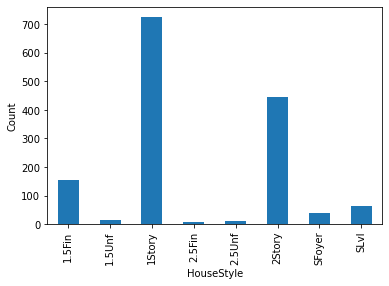

In [22]:
df.groupby([ 'HouseStyle'])['HouseStyle'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['HouseStyle' ])[['HouseStyle']].count()

### Figure 5.1 - First Floor Area - SalePrice correlation

correlation : (0.6058521846919146, 5.394710618971284e-147)


/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


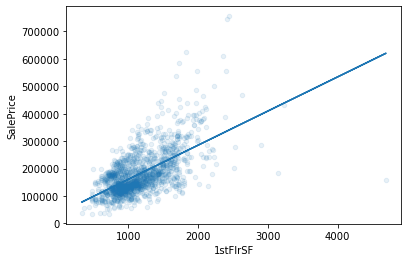

In [23]:
sf_model = sm.OLS(df.SalePrice, sm.add_constant(df['1stFlrSF']))
sf_p = sf_model.fit().params
x = df['1stFlrSF']
ax = df.plot(x='1stFlrSF', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, sf_p.const + sf_p['1stFlrSF'] * x)
print ("correlation :",scipy.stats.pearsonr(df.SalePrice, df['1stFlrSF']))

In [24]:
sf_p

const       36173.446795
1stFlrSF      124.500622
dtype: float64

### Figure 5.2 - Second Floor Area(non-zero values) - SalePrice correlation

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


correlation : (0.6733048324568381, 1.53336249389489e-84)


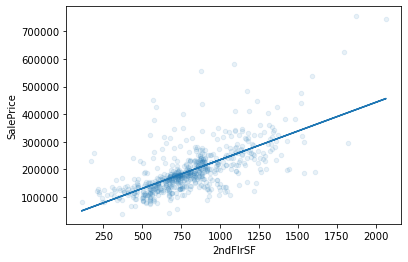

In [25]:
sf2_df = pd.DataFrame(df[df['2ndFlrSF'] !=0])
sf2_model = sm.OLS(sf2_df.SalePrice, sm.add_constant(sf2_df['2ndFlrSF']))
sf2_p = sf2_model.fit().params
# generate x-values for your regression line (two is sufficient)
x = sf2_df['2ndFlrSF']
# scatter-plot data
ax = sf2_df.plot(x='2ndFlrSF', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, sf2_p.const + sf2_p['2ndFlrSF'] * x)
print ("correlation :",scipy.stats.pearsonr(sf2_df.SalePrice, sf2_df['2ndFlrSF']))

In [26]:
sf2_p

const       26146.305437
2ndFlrSF      208.384700
dtype: float64

In [27]:
# I will combine the first and second floor sf columns, as they show very similar correlations, and then drop them.
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df.drop(columns=['1stFlrSF','2ndFlrSF'], inplace=True)

### Figure 5.3 Total Area Correlation to SalePrice
##### Notice this correlation is stronger than either of the previous two.

correlation : (0.7168830793692811, 1.183940787187772e-230)


/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


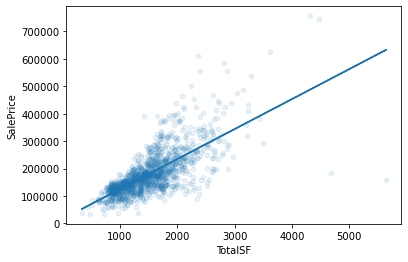

In [28]:
sf_tot_model = sm.OLS(df.SalePrice, sm.add_constant(df['TotalSF']))
sf_tot_p = sf_tot_model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df['TotalSF']
# scatter-plot data
ax = df.plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, sf_tot_p.const + sf_tot_p['TotalSF'] * x)
print ("correlation :",scipy.stats.pearsonr(df.SalePrice, df['TotalSF']))

### Figure 6.1 - Correlation between SalePrice and Finished Basement size

correlation : (0.4716904265235731, 3.7404328484059427e-56)


/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


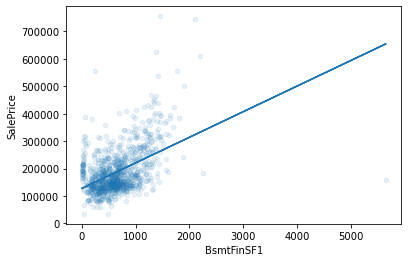

In [29]:
sfb_df = pd.DataFrame(df[df['BsmtFinSF1'] !=0])
sfb_model = sm.OLS(sfb_df.SalePrice, sm.add_constant(sfb_df['BsmtFinSF1']))
sfb_p = sfb_model.fit().params
x = sfb_df['BsmtFinSF1']
ax = sfb_df.plot(x='BsmtFinSF1', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, sfb_p.const + sfb_p['BsmtFinSF1'] * x)
print("correlation :",scipy.stats.pearsonr(sfb_df.SalePrice, sfb_df['BsmtFinSF1']))

### Figure 6.2 Correlation between Finished Basement Area and Total Square footage

correlation : (0.36099824135966696, 6.25327800349369e-32)


/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


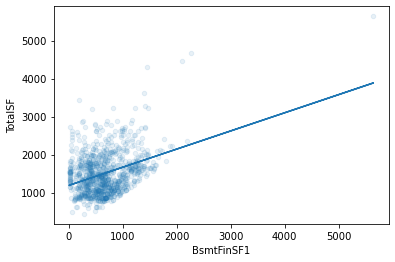

In [30]:
sf2_df = pd.DataFrame(df[df['BsmtFinSF1'] !=0])
sf2_model = sm.OLS(sf2_df.TotalSF, sm.add_constant(sf2_df['BsmtFinSF1']))
sf2_p = sf2_model.fit().params
x = sf2_df['BsmtFinSF1']
ax = sf2_df.plot(x='BsmtFinSF1', y='TotalSF', kind='scatter', alpha = 0.1)
ax.plot(x, sf2_p.const + sf2_p['BsmtFinSF1'] * x)
print ("correlation :",scipy.stats.pearsonr(sf2_df.TotalSF, sf2_df['BsmtFinSF1']))

### Figure 6.2 - Unfinished basement to SalePrice Correlation

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


correlation : (0.16926100049514187, 4.378835472890501e-10)


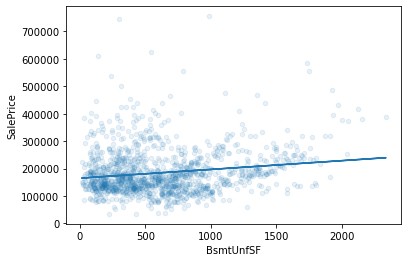

In [31]:
sfub_df = pd.DataFrame(df[df['BsmtUnfSF'] !=0])
sfub_model = sm.OLS(sfub_df.SalePrice, sm.add_constant(sfub_df['BsmtUnfSF']))
sfub_p = sfub_model.fit().params
x = sfub_df['BsmtUnfSF']
ax = sfub_df.plot(x='BsmtUnfSF', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, sfub_p.const + sfub_p['BsmtUnfSF'] * x)
print ("correlation :",scipy.stats.pearsonr(sfub_df.SalePrice, sfub_df['BsmtUnfSF']))

### Figure 6.3 - Mean values of homes with finished basements, unfinished basements and those with no basement

In [32]:
print("Unfinished basement mean value:  " + "\033[1;48;34m$ {:,.2f}".format(df[df['BsmtUnfSF'] != 0]['SalePrice'].mean()))
print("\033[mNo basement mean value:  " + "\033[1;48;34m$ {:,.2f}".format(df[(df['BsmtUnfSF'] == 0) & (df['BsmtFinSF1'] == 0)]['SalePrice'].mean()))
print("\033[mFinished basement mean value:  " + "\033[1;48;34m$ {:,.2f}".format(df[df['BsmtFinSF1'] != 0]['SalePrice'].mean()))

Unfinished basement mean value:  $ 184,790.89
No basement mean value:  $ 105,652.89
Finished basement mean value:  $ 188,164.59


In [33]:
#I'm going to combine the Finished and Unfinished Basement data with the TotalSF column.
print(df['TotalSF'].mean())
df['TotalSF'] = df['TotalSF'] + df['BsmtUnfSF'] + df['BsmtFinSF1'] + df['BsmtFinSF2']
print(df['TotalSF'].mean())

1509.6191780821919
2567.0486301369865


### Figure 7 - Correlation of SalePrice to TotalSF
##### I checked in this section to see what the correlation after combining 1st and 2nd floor areas.

correlation : (0.7822600527979842, 5.511173086257728e-302)


/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


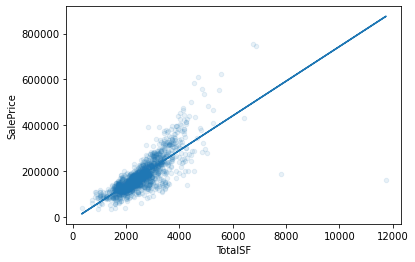

In [34]:
sf_tot_model = sm.OLS(df.SalePrice, sm.add_constant(df['TotalSF']))
sf_tot_p = sf_tot_model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df['TotalSF']
# scatter-plot data
ax = df.plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, sf_tot_p.const + sf_tot_p['TotalSF'] * x)
print ("correlation :",scipy.stats.pearsonr(df.SalePrice, df['TotalSF']))

### Figure 8 - Comparing Basement Exposure with SalePrice and TotalSF

,mean,std
BsmtExposure,,
Av,2674.167421,834.046649
Gd,3221.738806,1258.479862
Mn,2700.684211,735.251932
No,2483.677859,667.408470


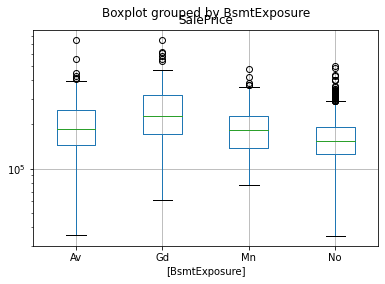

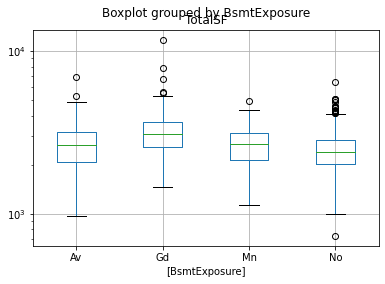

In [35]:
df.boxplot(column=['SalePrice'],by = ['BsmtExposure']).set_yscale('log')
pd.DataFrame(df.groupby( ['BsmtExposure'])['SalePrice'].describe().loc[:,['mean','std']])
df.boxplot(column=['TotalSF'],by = ['BsmtExposure']).set_yscale('log')
pd.DataFrame(df.groupby( ['BsmtExposure'])['TotalSF'].describe().loc[:,['mean','std']])

In [36]:
#I'm removing All columns about basements, as the area of basements are now included in the TotalSF 
# variable, BsmtExposure by SalePrice is very similar to BsmtExposure by TotalSF.
print(len(df.columns))
df.drop(columns=['BsmtExposure','BsmtFinType1','BsmtFinSF1', \
                 'BsmtQual','BsmtCond','BsmtFinType2', \
                 'BsmtFinSF2','BsmtUnfSF'], inplace=True)
print(len(df.columns))

80
72


### Figure 9 - Compare SalePrice with LotShape and LandContour

,mean,std
LandContour,,
Bnk,143104.079365,49361.244074
HLS,231533.940000,101790.139741
Low,203661.111111,83935.353620
Lvl,180183.746758,78463.567918


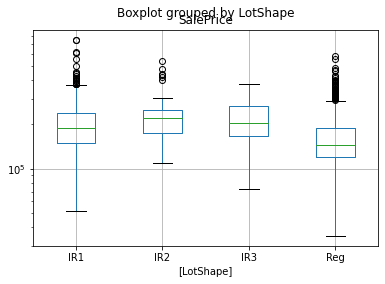

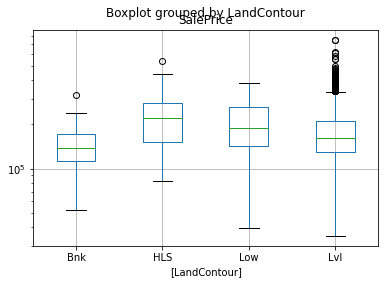

In [37]:
df.boxplot(column=['SalePrice'],by = ['LotShape']).set_yscale('log')
pd.DataFrame(df.groupby( ['LotShape'])['SalePrice'].describe().loc[:,['mean','std']])
df.boxplot(column=['SalePrice'],by = ['LandContour']).set_yscale('log')
pd.DataFrame(df.groupby( ['LandContour'])['SalePrice'].describe().loc[:,['mean','std']])

In [38]:
#It doesn't appear that LandCountour or LotShape have meaningful impact on price. I will drop them.
df.drop(columns=['LandContour','LotShape'], inplace=True)

In [39]:
df.select_dtypes('int64').T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
OverallQual,7,6,7,7,8,5,8,7,7,5,...,5,8,5,5,7,6,6,7,5,5
OverallCond,5,8,5,5,5,5,5,6,5,6,...,5,5,5,5,5,5,6,9,6,6
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939,...,1974,2008,2005,2006,2004,1999,1978,1941,1950,1965
YearRemodAdd,2003,1976,2002,1970,2000,1995,2005,1973,1950,1950,...,1974,2009,2005,2006,2005,2000,1988,2006,1996,1965
TotalBsmtSF,856,1262,920,756,1145,796,1686,1107,952,991,...,896,1573,547,1140,1221,953,1542,1152,1078,1256
LowQualFinSF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GrLivArea,1710,1262,1786,1717,2198,1362,1694,2090,1774,1077,...,1792,1578,1072,1140,1221,1647,2073,2340,1078,1256


### SalePrice Info

In [40]:
#Range, mean and median of home values
print('\033[4mRange of prices:\033[m' + os.linesep + '\033[m\n\033[1;48;34m$' + str(df['SalePrice'].min()) + ' - $' + str(df['SalePrice'].max()))
print('\n' + '\033[mMean: \033[1;48;34m$' + "{:,.2f}".format(df['SalePrice'].mean()))
print('\033[mMedian: \033[1;48;34m$' + "{:,.2f}".format(df['SalePrice'].median()))

Range of prices:

$34900 - $755000

Mean: $180,921.20
Median: $163,000.00


### Loop over all of the int datatypes and examine the correlations in those columns with SalePrice

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


OverallCond  correlation :  (-0.07785589404867803, 0.0029123512679174826)
LowQualFinSF  correlation :  (-0.02560613000067955, 0.32820730984074886)
BsmtHalfBath  correlation :  (-0.016844154297359006, 0.5201536357280931)
BedroomAbvGr  correlation :  (0.16821315430074, 9.927497326186164e-11)
KitchenAbvGr  correlation :  (-0.13590737084214122, 1.8604260320766925e-07)


/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


EnclosedPorch  correlation :  (-0.12857795792595675, 8.255770475119532e-07)
3SsnPorch  correlation :  (0.04458366533574842, 0.08858170358062883)
ScreenPorch  correlation :  (0.1114465711429112, 1.9721400194702135e-05)
PoolArea  correlation :  (0.09240354949187321, 0.0004073489601199127)
MiscVal  correlation :  (-0.021189579640303255, 0.4184863494082891)
MoSold  correlation :  (0.046432245223819335, 0.07612757850609941)
YrSold  correlation :  (-0.028922585168730322, 0.26941319328103863)


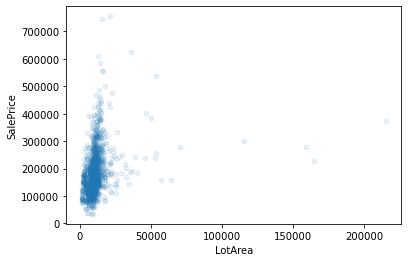

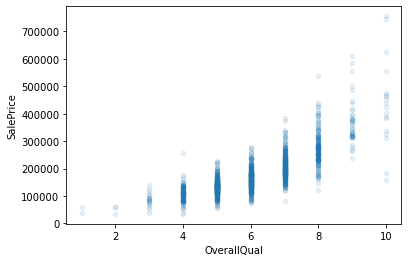

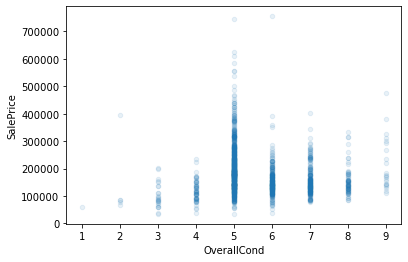

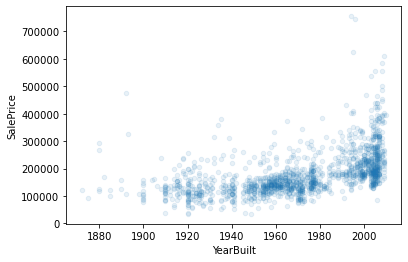

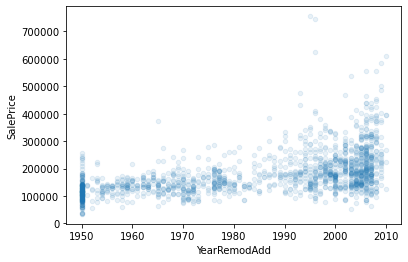

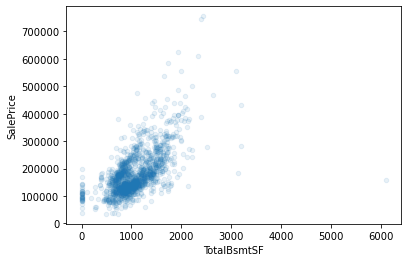

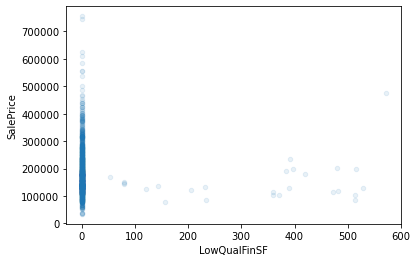

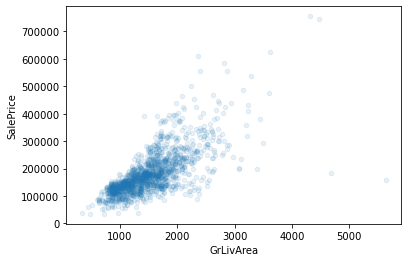

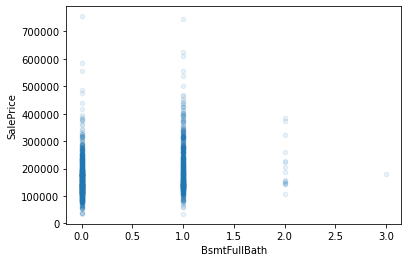

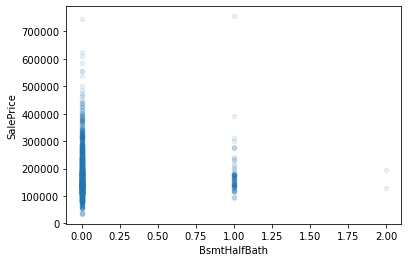

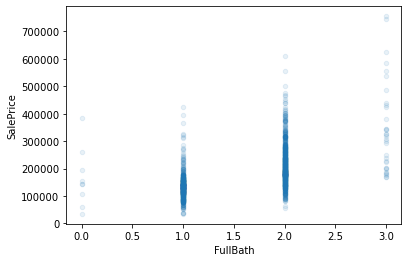

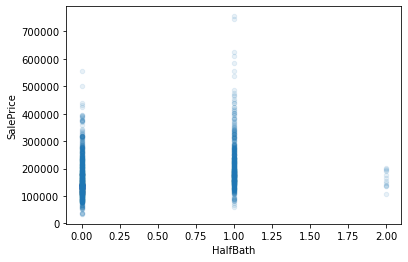

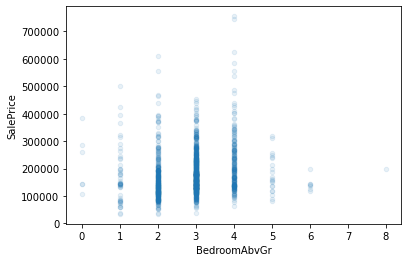

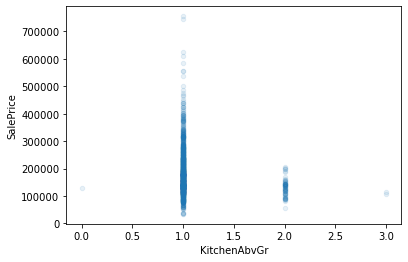

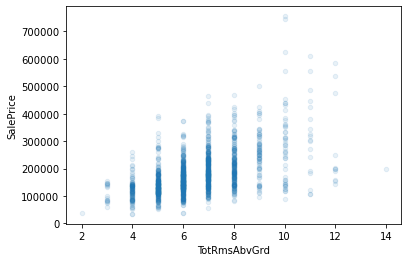

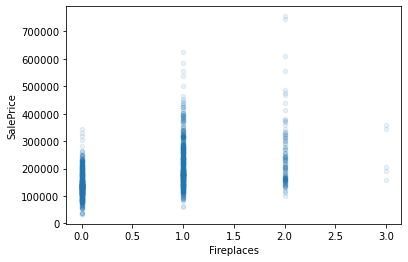

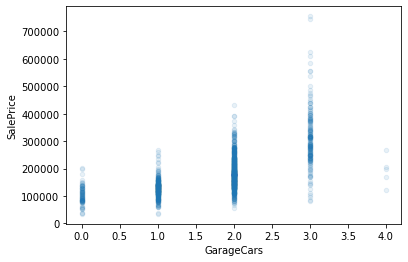

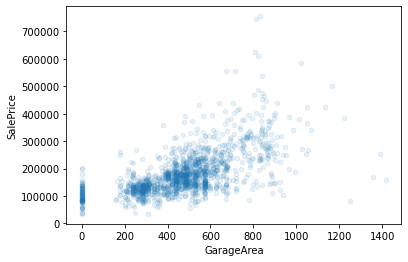

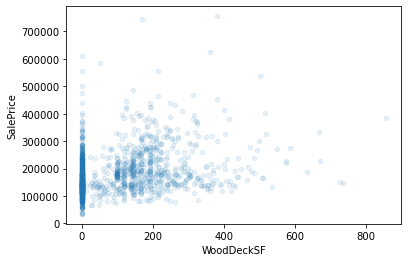

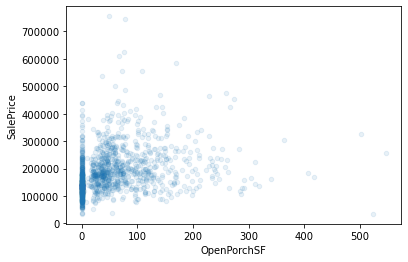

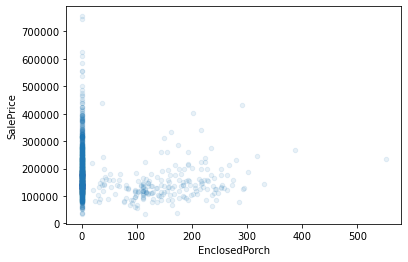

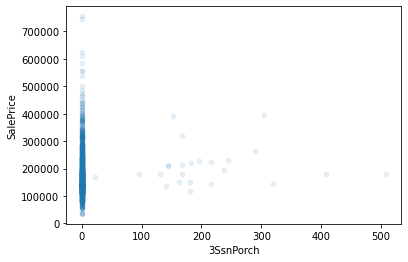

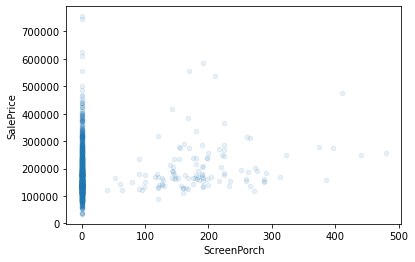

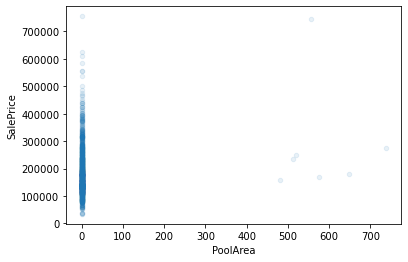

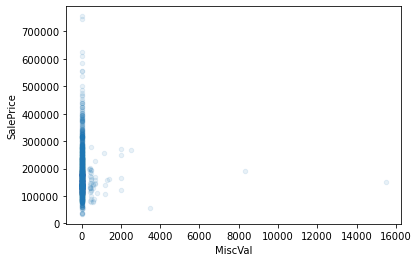

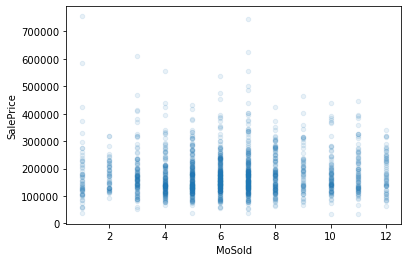

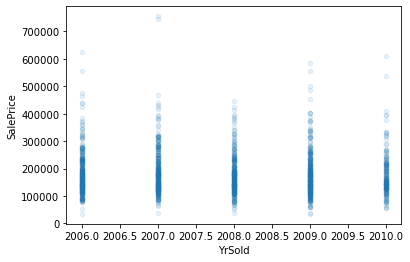

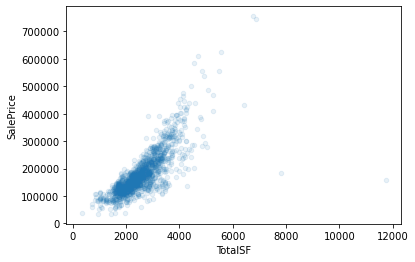

In [41]:
for column in df.select_dtypes('int64').columns:
    if(column not in ['Id', 'SalePrice', 'MSSubClass','MSZoning']):
        col_model = sm.OLS(df.SalePrice, sm.add_constant(df[column]))
        col_p = sfb_model.fit().params
        x = df[column]
        ax = df.plot(x=column, y='SalePrice', kind='scatter', alpha = 0.1)
        corrcoef = scipy.stats.pearsonr(df.SalePrice, df[column])
        if(np.abs(corrcoef[0]) < .2):
            print(column, " correlation : ",corrcoef)

In [42]:
df.select_dtypes('object').T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
BldgType,1Fam,1Fam,1Fam,1Fam,1Fam,1Fam,1Fam,1Fam,1Fam,2fmCon,...,Duplex,1Fam,TwnhsE,1Fam,1Fam,1Fam,1Fam,1Fam,1Fam,1Fam


In [43]:
#How many null values are there per column?
find_null_columns = {}
for column in df.columns:
    if(len(df[df[column].isnull()]) > 0):
        find_null_columns[column] = len(df[df[column].isnull()])
print('Number of null values:' + os.linesep)
for k,v in sorted(find_null_columns.items(), key=lambda x: x[1], reverse=True):
    print('\033[m ' + k + ': \033[1;48;34m' + str(v) + '\n')

Number of null values:

 PoolQC: 1453

 MiscFeature: 1406

 Alley: 1369

 Fence: 1179

 FireplaceQu: 690

 LotFrontage: 259

 GarageType: 81

 GarageYrBlt: 81

 GarageFinish: 81

 GarageQual: 81

 GarageCond: 81

 MasVnrType: 8

 MasVnrArea: 8

 Electrical: 1



In [44]:
#There is such little data on pools, I want to remove pool related columns, only after looking at the data.
print(str(df[df['PoolArea'] > 0]['PoolArea']) + os.linesep*2 + str(df[df['PoolArea'] > 0]['SalePrice']))

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64

197     235000
810     181000
1170    171000
1182    745000
1298    160000
1386    250000
1423    274970
Name: SalePrice, dtype: int64


In [45]:
#I notice an interesting trend in that pools are associated with higher sales prices.
#With that said, I don't think it tells much in terms of size, and with such little pool data,
#I believe the most important factor is whether the home has a pool or not, and that may be
#significant, therefore I will remove these values and simply add a column HasPool boolean.
#In the event that I later find that pools are a significant explanation of outliers, then I 
#may remove those observations from the dataset.
print(df.shape)
print(df['PoolQC'].unique())
df['HasPool'] = df['PoolQC'].isin(['Ex','Fa','Gd'])
print(df.shape)
df.drop(columns=['PoolQC','PoolArea'], inplace=True)
print(len(df[df['HasPool']]))
print(df.shape)

(1460, 70)
[nan 'Ex' 'Fa' 'Gd']
(1460, 71)
7
(1460, 69)


In [46]:
#I'm also going to look into the values of MiscFeature to see if there may be enough data to analyze.
print(df['MiscFeature'].unique())
#The greatest concern I have with this column is 'Other', so I want to see how frequent it appears.
print(df[df['MiscFeature'] == 'Othr']['MiscFeature'].count())
#Because there are only two, I'm wondering how much those two will skew the data.
print(df[df['MiscFeature'] == 'Othr']['SalePrice'])
#I believe these could be negative impacts on the sales price, though we can't be 
#certain, given the low saleprice of each.
#Additionally, there doesn't seem to be any quality indicators for these values, so I will remove this column.

df.drop(columns=['MiscFeature'], inplace=True)
print(df.shape)

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
2
705     55000
873    133000
Name: SalePrice, dtype: int64
(1460, 68)


In [47]:
#Now the MiscVal column has my attention, I will examine it.
print(df['MiscVal'].unique())
#The greatest concern I have with this column is 'Other', so I want to see how frequent it appears.
print(df[df['MiscVal'] != 0]['MiscVal'].count())
#Because there are only two, I'm wondering how much those two will skew the data.
print("{:,.2f}".format(df[df['MiscVal'] != 0]['SalePrice'].mean()))
#I see the mean of these homes that have miscellaneous features are somewhat low, and the majority
#of observations do not have any value here, so I will remove it.
df.drop(columns=['MiscVal'], inplace=True)

[    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]
52
152,666.21


In [48]:
#There is also a lot of missing data for fences, so I'm gonna see what types of values we have.
print(df['Fence'].unique())
#I didn't know what these meant, so I turned to the documentation. It turns out this indicates 
#mostly a level of privacy, and might be better as a boolean. Another interesting fact might be
#a correlation between the home type and whether it has a fence. For example, rowHomes may have 
#small fences, condo's may have none at all. I'm thinking that any correlation between fence and
#price may correspond to a type of housing, and as about 4/5ths of the homes have no fence data
#listed, I believe the best move is to remove this column.
df.drop(columns=['Fence'], inplace=True)
df.shape

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


(1460, 66)

In [49]:
#How many null values are there per column?
find_null_columns = {}
for column in df.columns:
    if(len(df[df[column].isnull()]) > 0):
        find_null_columns[column] = len(df[df[column].isnull()])
print('Number of null values:' + os.linesep)
for k,v in sorted(find_null_columns.items(), key=lambda x: x[1], reverse=True):
    print(k + ': ' + str(v))
#I still see alley's are the biggest row of null values, and I will look into those
#in more detail next. I don't know much about alleys.

Number of null values:

Alley: 1369
FireplaceQu: 690
LotFrontage: 259
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
MasVnrType: 8
MasVnrArea: 8
Electrical: 1


In [50]:
print('Alley Types:')
for row in df['Alley'].unique():
    print(row)

Alley Types:
nan
Grvl
Pave


In [51]:
print('Gravel: ' +str(len(df[df['Alley'] == 'Grvl'])))
print('Pavement: ' +str(len(df[df['Alley'] == 'Pave'])))

Gravel: 50
Pavement: 41


In [52]:
print('Gravel: $' + "{:,.2f}".format(np.min(df[df['Alley'] == 'Grvl']['SalePrice']))+ ' - ' "{:,.2f}".format(np.max(df[df['Alley'] == 'Grvl']['SalePrice'])))
print('Pavement: $' + "{:,.2f}".format(np.mean(df[df['Alley'] == 'Pave']['SalePrice'])))
print('No Alley: $' + "{:,.2f}".format(np.mean(df[df['Alley'].isin([np.nan])]['SalePrice'])))
#Similar to fences, I'm going to make a couple of hypotheses, namely that the alley
#type corresponds in some way to the age of homes, ie those with gravel are older and, 
#second, that the homes with alleys that are paved correspond with zoning in some way. 
#ie. more densely populated areas, such as urban zones. I will verify this.
print('Average year built and most frequent zone for gravel: ' +str(np.mean(df[df['Alley'] == 'Grvl']['YearBuilt'])))
print('Average year built and most frequent zone for paved: ' +str(np.mean(df[df['Alley'] == 'Pave']['YearBuilt'])))
print('Zones grouped by alley type:' + os.linesep)
print(df.groupby('Alley')['MSZoning'].value_counts())
#It turns out my second hypothesis was incorrect, there are more alleys, period, in low and medium density zones.

Gravel: $52,500.00 - 256,000.00
Pavement: $168,000.59
No Alley: $183,452.13
Average year built and most frequent zone for gravel: 1919.74
Average year built and most frequent zone for paved: 1968.3170731707316
Zones grouped by alley type:

Alley  MSZoning
Grvl   RM          36
       RL          14
Pave   FV          24
       RM           7
       RL           6
       C (all)      2
       RH           2
Name: MSZoning, dtype: int64


In [53]:
#What types of streets exist in the dataset? 
print('Street Types:')
for row in df['Street'].unique():
    print(row)

Street Types:
Pave
Grvl


In [54]:
#Is there much variation in the type of street?
print('Gravel: ' +str(len(df[df['Street'] == 'Grvl'])))
print('Pavement: ' +str(len(df[df['Street'] == 'Pave'])))

Gravel: 6
Pavement: 1454


In [55]:
#What is the difference between the average price of a home by street type?
print('Gravel: $' + "{:,.2f}".format(np.mean(df[df['Street'] == 'Grvl']['SalePrice'])))
print('Pavement: $' + "{:,.2f}".format(np.mean(df[df['Street'] == 'Pave']['SalePrice'])))

Gravel: $130,190.50
Pavement: $181,130.54


In [56]:
#What is the range of these values?
print('Min:' + os.linesep*2 + 'Gravel: \033[1;48;34m$' + " {:,.2f}".format(np.min(df[df['Street'] == 'Grvl']['SalePrice'])))
print('\033[mPavement:  ' + "\033[1;48;34m$ {:,.2f}".format(np.min(df[df['Street'] == 'Pave']['SalePrice'])))
print(os.linesep + '\033[mMax:' + os.linesep*2 + '\033[mGravel: ' + " \033[1;48;34m$ {:,.2f}".format(np.max(df[df['Street'] == 'Grvl']['SalePrice'])))
print('\033[mPavement:  ' + "\033[1;48;34m$ {:,.2f}".format(np.max(df[df['Street'] == 'Pave']['SalePrice'])))

Min:

Gravel: $ 55,993.00
Pavement:  $ 34,900.00

Max:

Gravel:  $ 228,950.00
Pavement:  $ 755,000.00


In [57]:
print(df.shape)
#I think central air is probably important, but it may not be. The region may not 
#require air conditioning, or maybe most homes will have it. I think this could 
#be one to look at, but I want to see the split here.
print('The average price for the ' + str(df[df['CentralAir'] == 'Y']['SalePrice'].count()) \
    + ' homes with central air is: $'\
    + "\033[1;48;34m{:,.2f}".format(df[df['CentralAir'] == 'Y']['SalePrice'].mean())\
    + '.' + os.linesep*2 \
    + '\033[mThe average price for the '+ str(df[df['CentralAir'] == 'N']['SalePrice'].count()) \
    + ' homes with central air is: $' \
    + "\033[1;48;34m{:,.2f}".format(df[df['CentralAir'] == 'N']['SalePrice'].mean()))
#As I suspected, the price difference is quite dramatic. My guess is that the homes without central
#air are perhaps smaller, and other differences will explain the difference in mean price. A central
#air system doesn't cost $80,000. I will drop this column.
df.drop(columns=['CentralAir'], inplace=True)

(1460, 66)
The average price for the 1365 homes with central air is: $186,186.71.

The average price for the 95 homes with central air is: $105,264.07


In [58]:
#Reexamine null columns
find_null_columns = {}
for column in df.columns:
    if(len(df[df[column].isnull()]) > 0):
        find_null_columns[column] = len(df[df[column].isnull()])
print('Number of null values:' + os.linesep)
for k,v in sorted(find_null_columns.items(), key=lambda x: x[1], reverse=True):
    print(k + ': ' + str(v))

Number of null values:

Alley: 1369
FireplaceQu: 690
LotFrontage: 259
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
MasVnrType: 8
MasVnrArea: 8
Electrical: 1


In [59]:
#Next I need to start assigning values to those that are null. I will begin with Alleys. This is an object, 
#so I will use the word None in place of null values.
df['Alley'].replace(to_replace=np.nan, value='None', inplace=True)
print(df[df['Alley'] == 'None']['Alley'])

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Name: Alley, Length: 1369, dtype: object


In [60]:
#I will do the same thing as above now with the remaining string types.
df['FireplaceQu'].replace(to_replace=np.nan, value='None', inplace=True)
print(df[df['FireplaceQu'] == 'None']['FireplaceQu'])
#LotFrontage is unnecessarily a float value, so I will convert it to an integer.
df['LotFrontage'].replace(to_replace=np.nan, value=0.0, inplace=True)
print(df[df['LotFrontage'] == np.nan]['LotFrontage'])
df['LotFrontage'] = df['LotFrontage'].astype('int')
print(df['LotFrontage'].dtype)

0       None
5       None
10      None
12      None
15      None
        ... 
1452    None
1453    None
1454    None
1458    None
1459    None
Name: FireplaceQu, Length: 690, dtype: object
Series([], Name: LotFrontage, dtype: float64)
int64


In [61]:
df['GarageCond'].replace(to_replace=np.nan, value='None', inplace=True)
df['GarageQual'].replace(to_replace=np.nan, value='None', inplace=True)
df['GarageFinish'].replace(to_replace=np.nan, value='None', inplace=True)
df['GarageType'].replace(to_replace=np.nan, value='None', inplace=True)
#I'm going to remove the garage year built column, because the years will be 
#difficult to analyze, and the year built should in most cases be the same as 
#the year the home was built. I will replace it with a column GarageOriginal
#if there are a good portion, say > 10% where these values don't match.
cond = df['GarageYrBlt'] == df['YearBuilt']
df['GarageOrig'] = 'Y' if np.where(cond) else 'N'
df.drop(columns=['GarageYrBlt'], inplace=True)
print(df['GarageOrig'].head())

0    Y
1    Y
2    Y
3    Y
4    Y
Name: GarageOrig, dtype: object


['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
1311
17


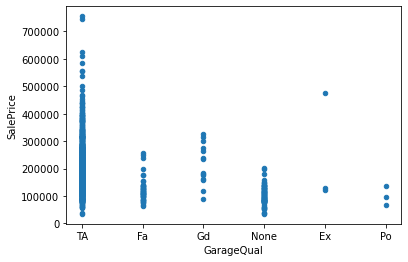

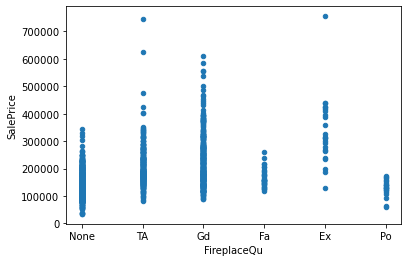

In [62]:
print(df['GarageQual'].unique())
print(df[df['GarageQual'] == 'TA']['GarageQual'].count())
#So I know that the great majority of Garages are considered to be of average quality.
#How many are above average?
print(df[df['GarageQual'].isin(['Ex','Gd'])]['GarageQual'].count())
#Let's take a closer look at the sales price by quality in a scatter plot.
df.plot(x='GarageQual', y='SalePrice', kind='scatter')
plt.show()
#This data isn't very meaningful. I want to see scatterplots of other quality variables to compare.
df.plot(x='FireplaceQu', y='SalePrice', kind='scatter')
plt.show()
#Outliers skew the data, but overall there is a correlation between both garage and fireplace quality,
#and SalePrice. I'm not convinced that they will justify a meaningful increase in sale price, however
#I will keep them for the time being.x

In [63]:
#I'm going to continue replacing null values now.

In [64]:
df[df['MSSubClass']==45]['YearBuilt']

15      1929
21      1930
127     1930
163     1956
325     1941
383     1928
437     1926
514     1926
555     1922
617     1954
826     1924
1069    1949
Name: YearBuilt, dtype: int64

In [65]:
null_columns = df.columns[df.isna().any()].tolist()
for col in null_columns:
    print(df[col].dtype)

object
float64
object


In [66]:
df['MasVnrType'].replace(to_replace=np.nan, value='None', inplace=True)
df['Electrical'].replace(to_replace=np.nan, value='None', inplace=True)
df['MasVnrArea'].replace(to_replace=np.nan, value=0.0, inplace=True)
print(df[df['MasVnrArea'] > 2]['MasVnrArea'].count())

589


In [67]:
df.columns[df.isna().any()].tolist()

[]

In [68]:
for col in df.select_dtypes('int64').columns: 
    if(col not in ['Id','MSSubClass','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','TotalSF','SalePrice']):
        df.drop(columns=[col], inplace=True)

In [69]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'Electrical', 'GrLivArea', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice', 'TotalSF',
       'HasPool', 'GarageOrig'],
      dtype='object')

In [70]:
corr = df.select_dtypes('int64').corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,SalePrice,TotalSF
Id,1.000000,-0.028365,-0.015415,0.008273,0.016570,-0.021917,-0.000322
OverallQual,-0.028365,1.000000,0.537808,0.593007,0.600671,0.790982,0.668155
TotalBsmtSF,-0.015415,0.537808,1.000000,0.454868,0.434585,0.613581,0.826742
GrLivArea,0.008273,0.593007,0.454868,1.000000,0.467247,0.708624,0.874373
GarageCars,0.016570,0.600671,0.434585,0.467247,1.000000,0.640409,0.536413
SalePrice,-0.021917,0.790982,0.613581,0.708624,0.640409,1.000000,0.782260
TotalSF,-0.000322,0.668155,0.826742,0.874373,0.536413,0.782260,1.000000


### Histograms to display Object value types

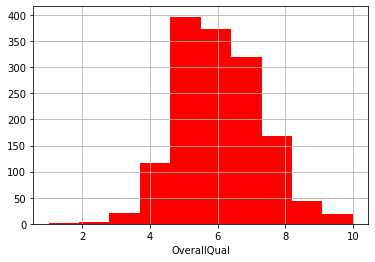

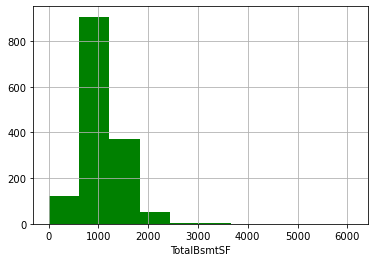

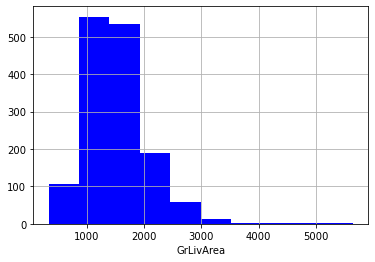

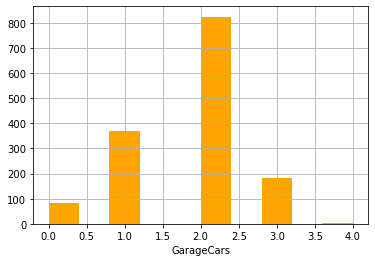

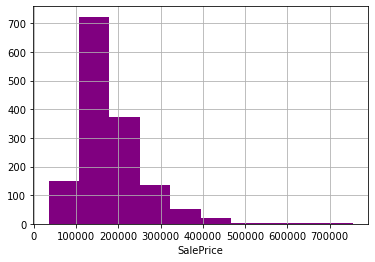

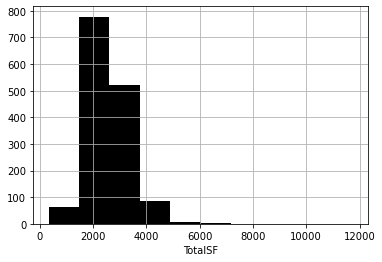

In [71]:
for idx, col in enumerate(df.select_dtypes('int64').columns):
    colors=['','red','green','blue','orange', 'purple', 'black']
    if(col != 'Id'):
        ax = df[col].hist(color=colors[idx])
        ax.set_xlabel(col)
        plt.show()

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'GarageOrig'],
      dtype='object')
ran


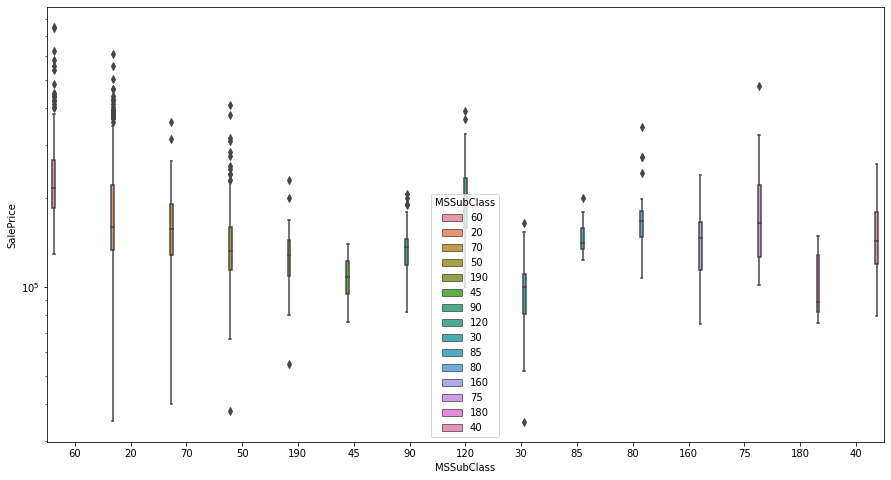

ran


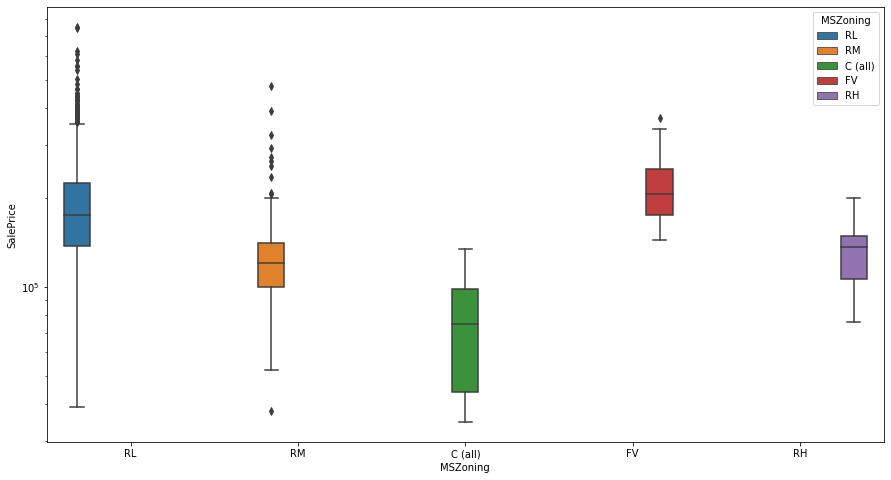

ran


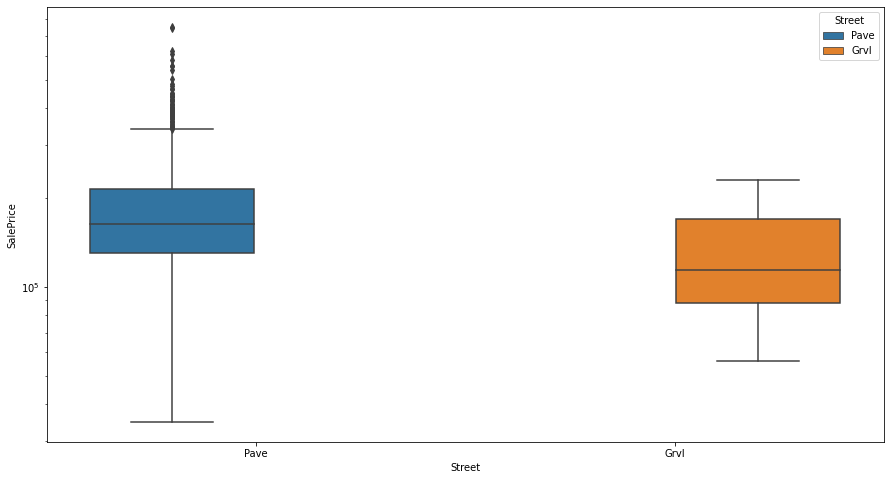

ran


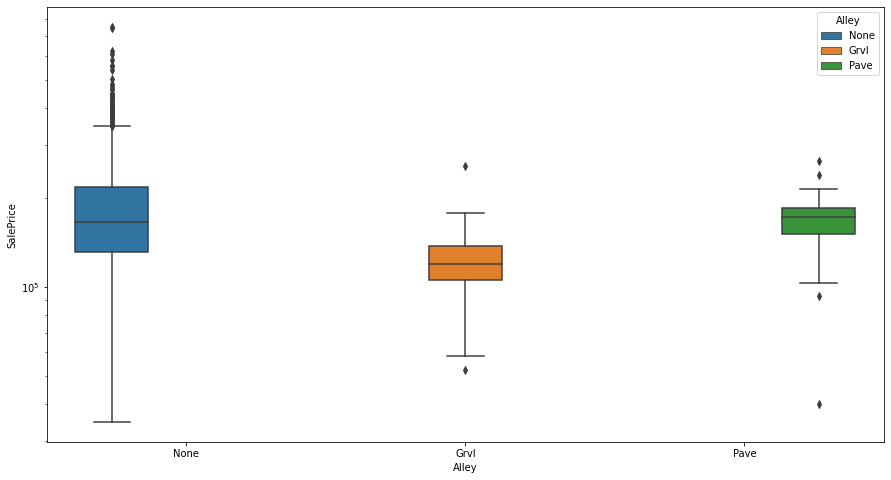

ran


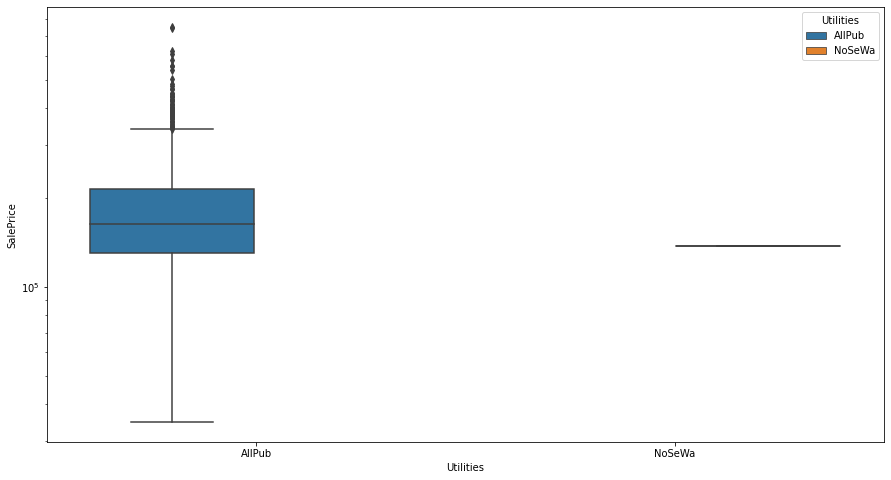

ran


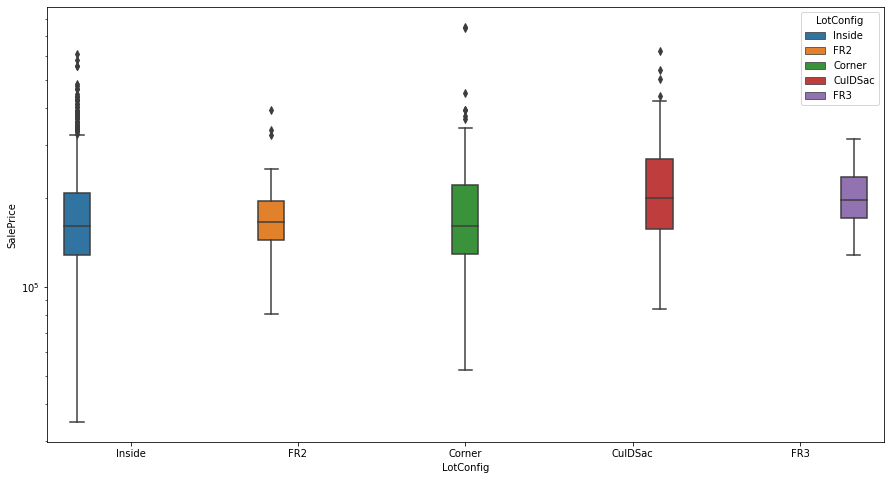

ran


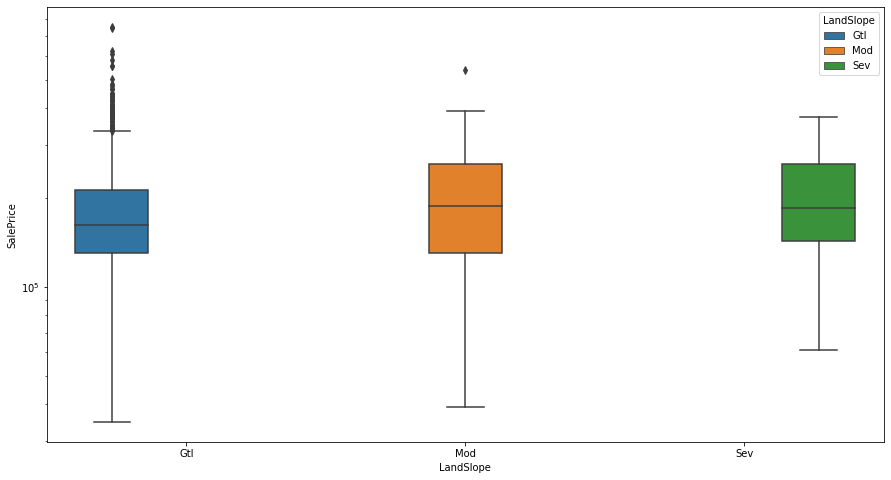

ran


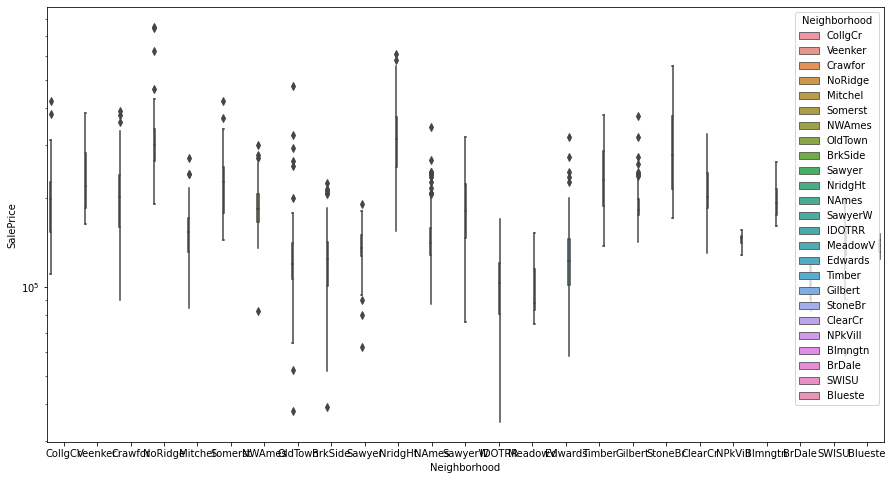

ran


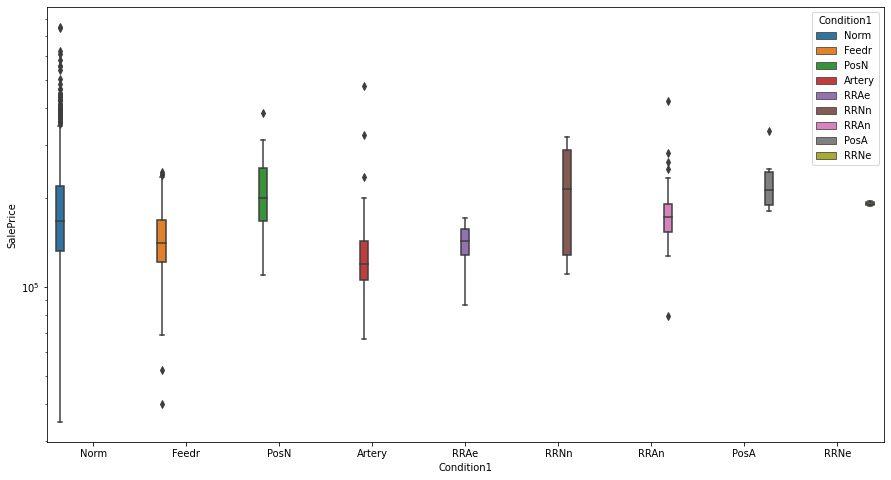

ran


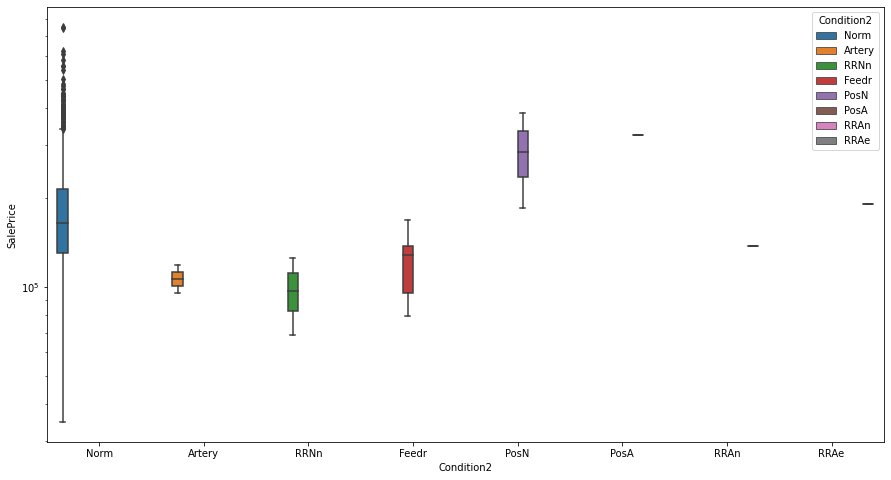

ran


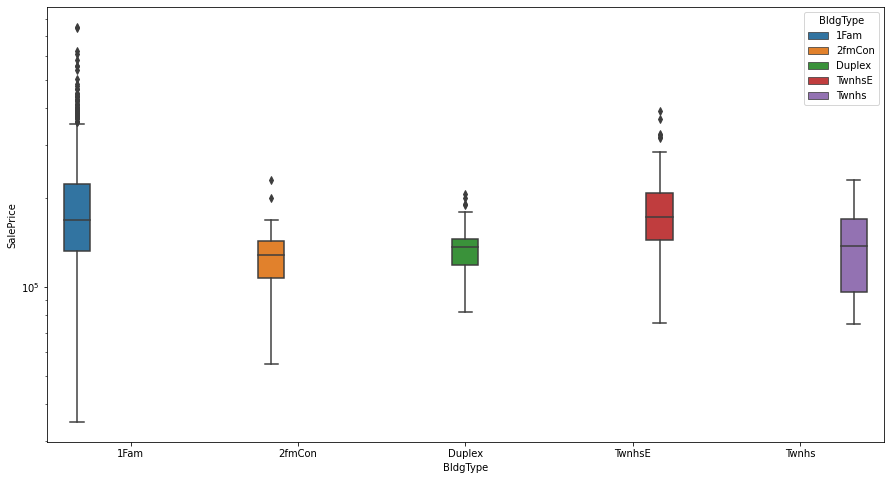

ran


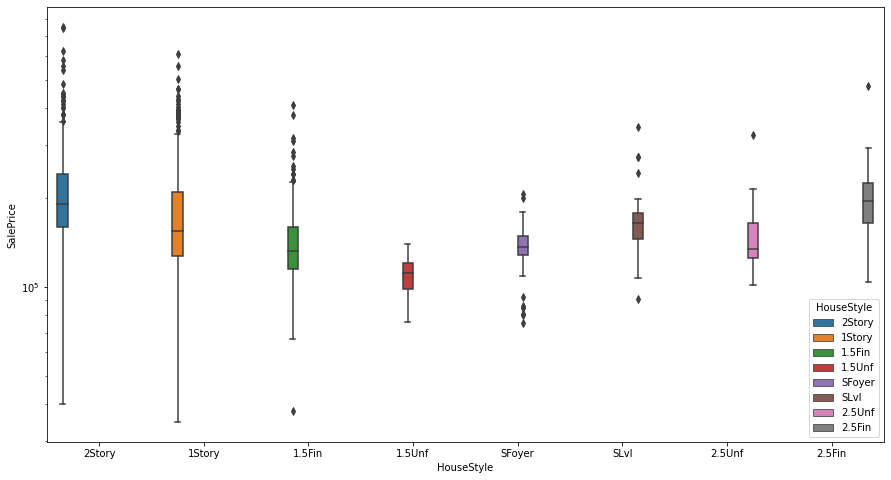

ran


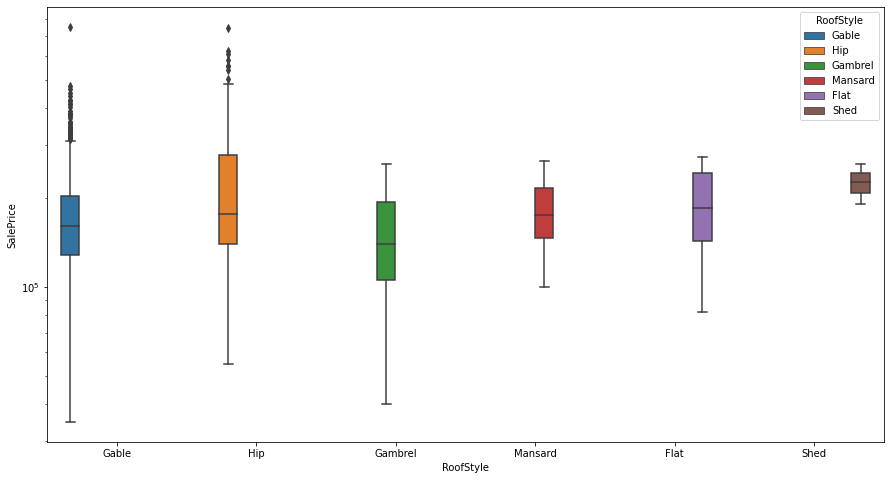

ran


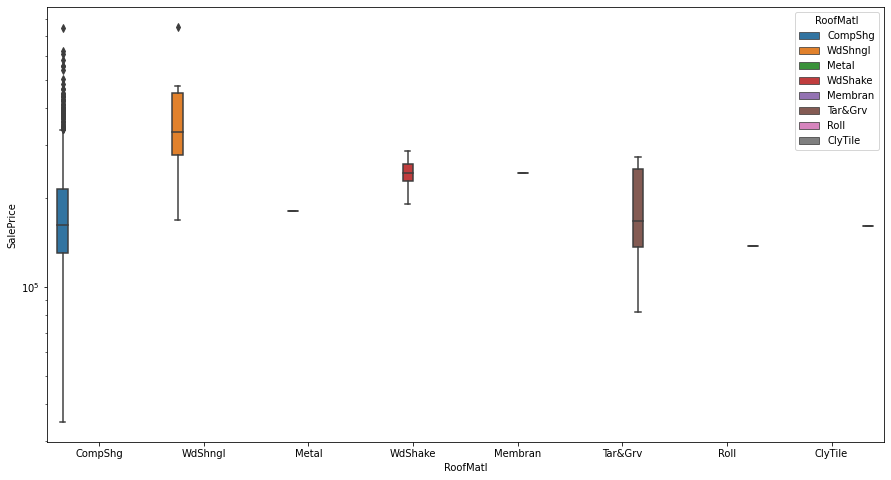

ran


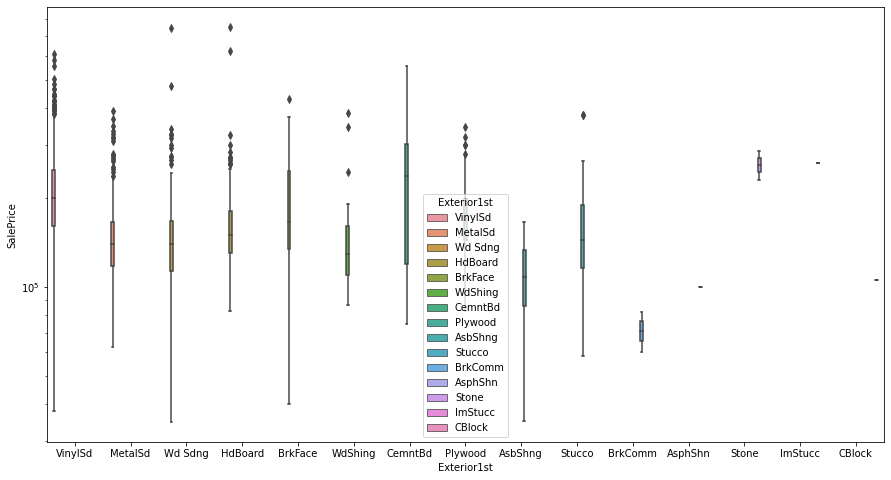

ran


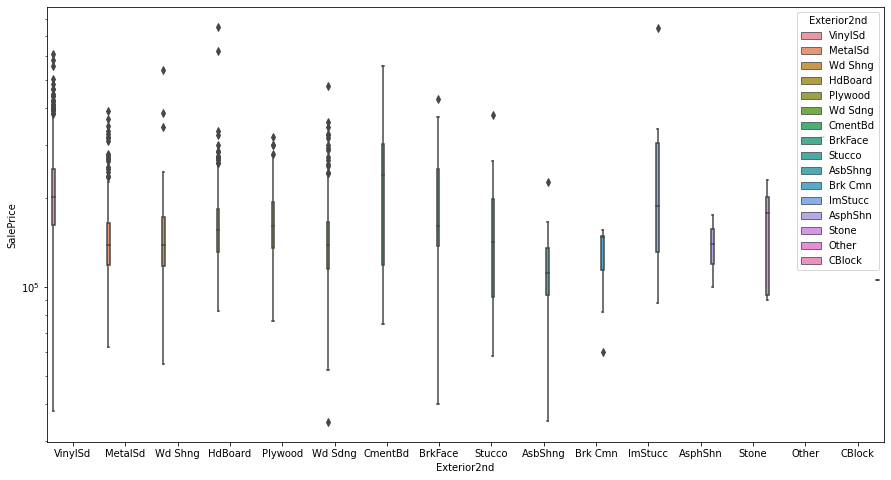

ran


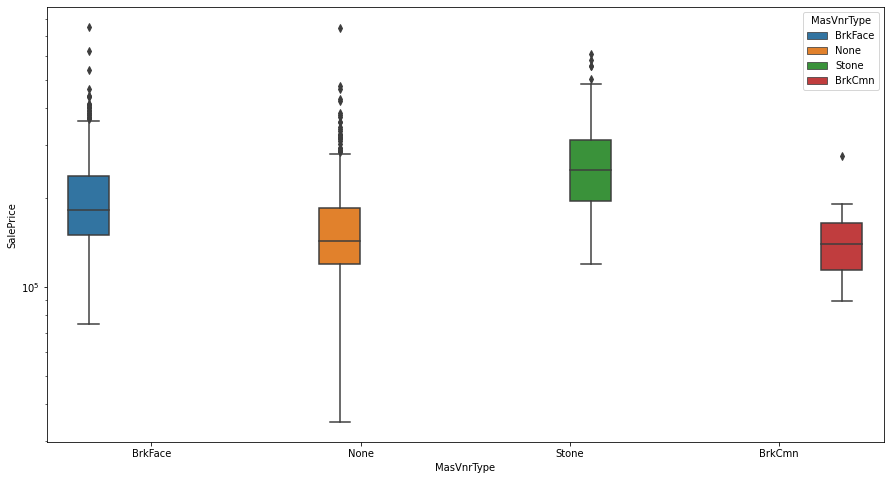

ran


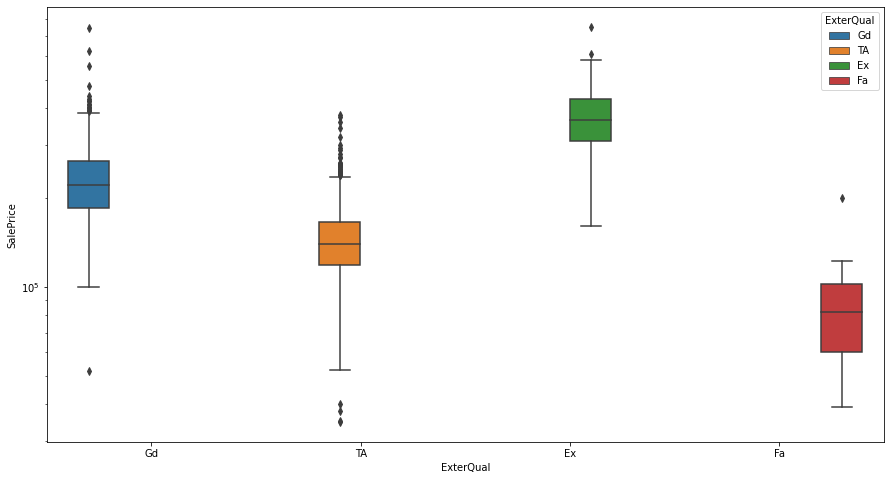

ran


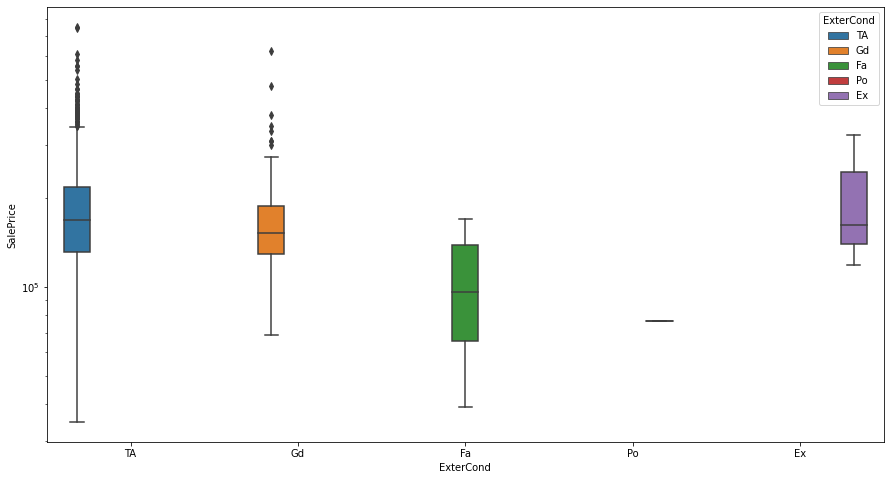

ran


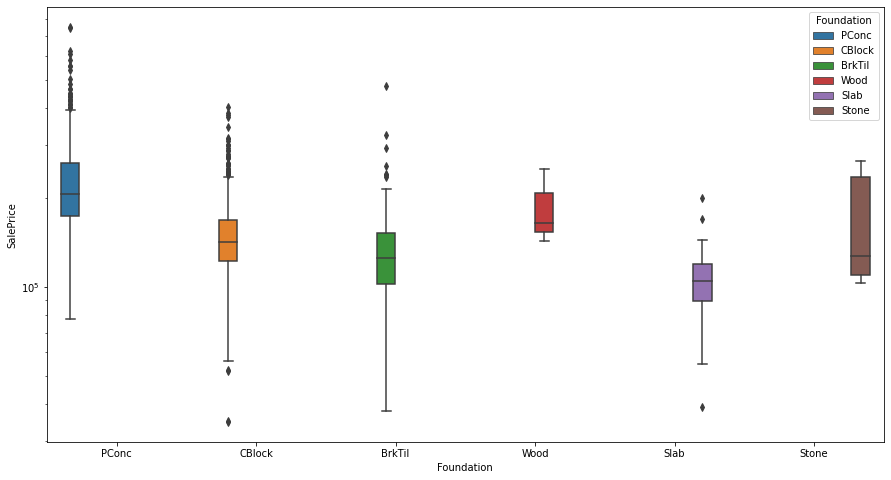

ran


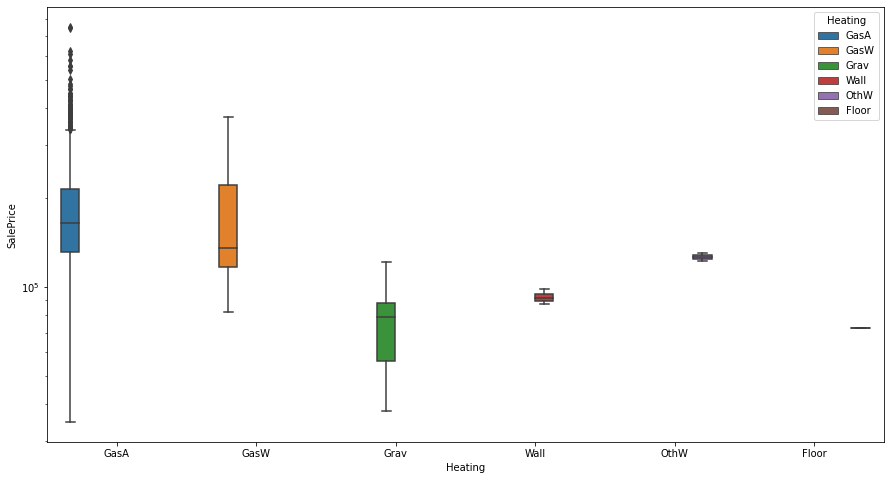

ran


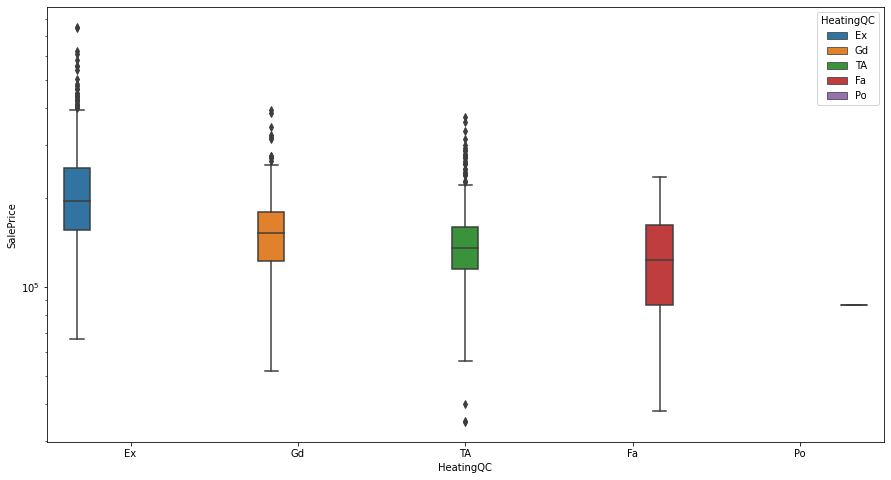

ran


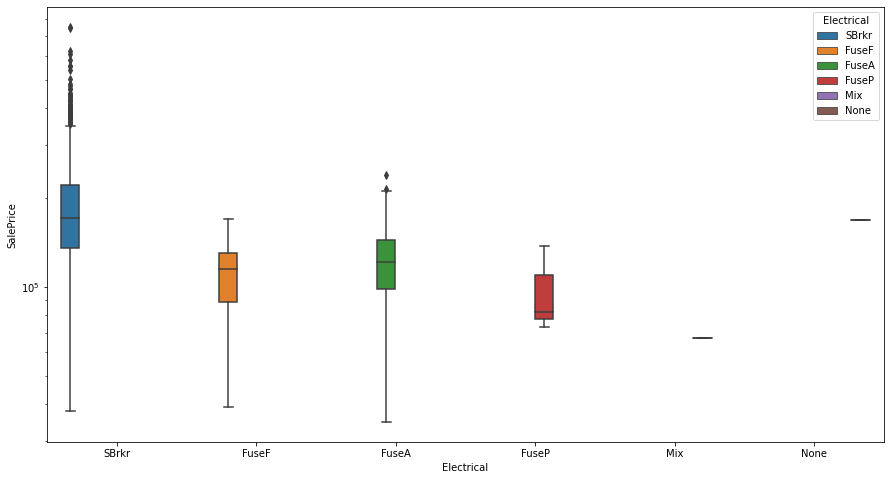

ran


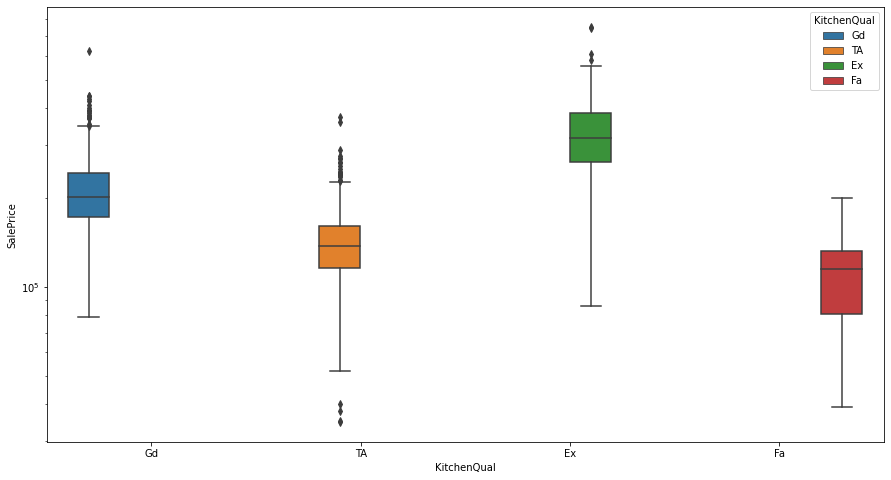

ran


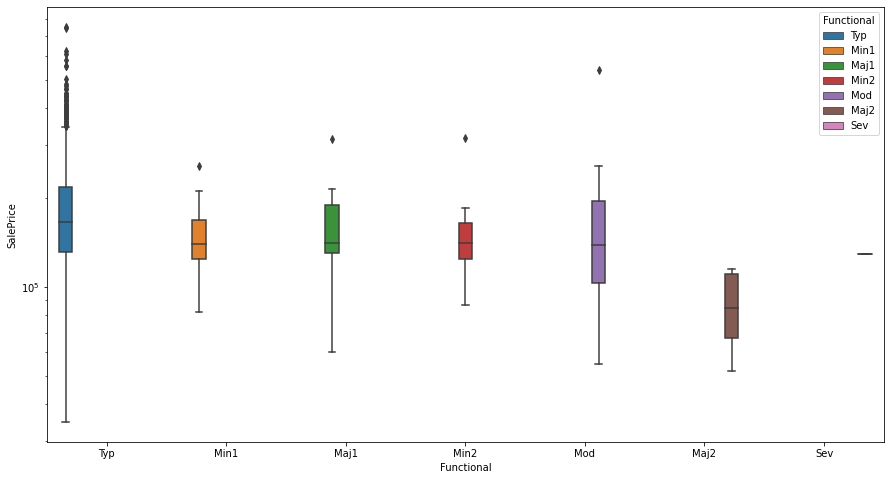

ran


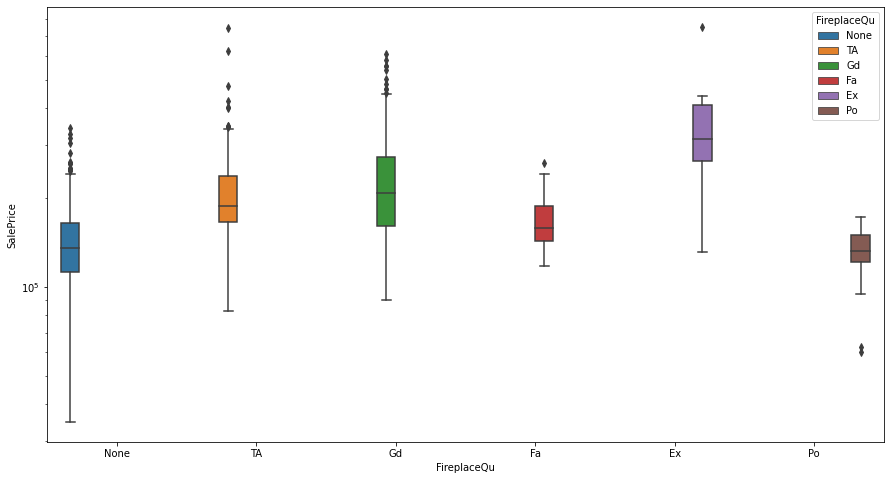

ran


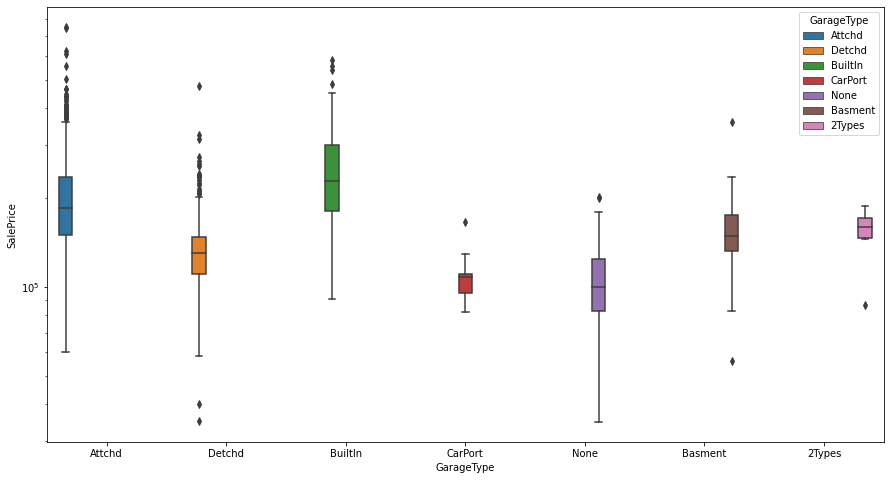

ran


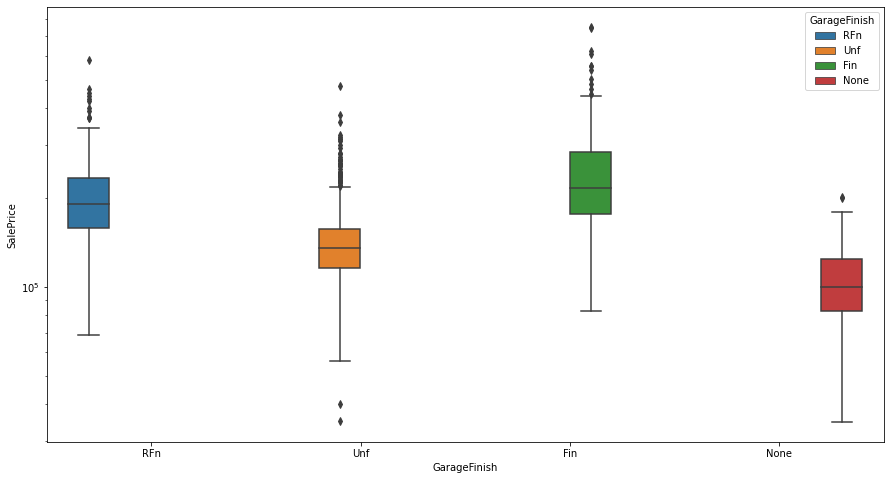

ran


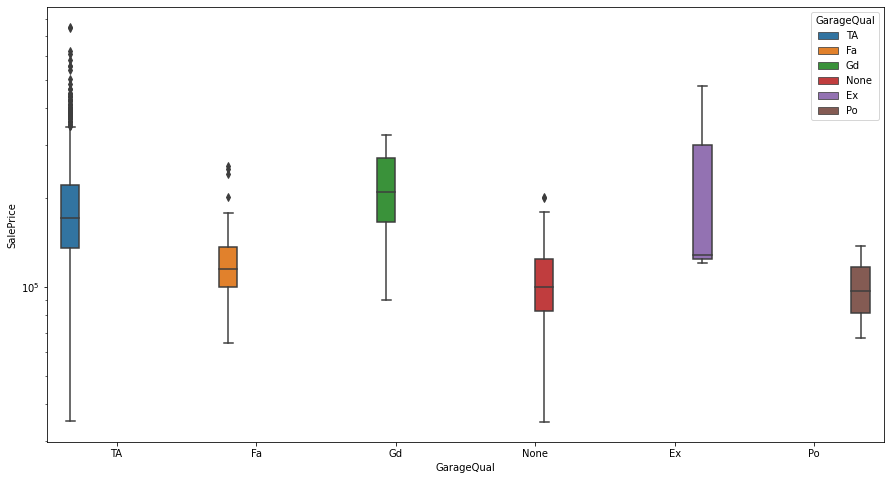

ran


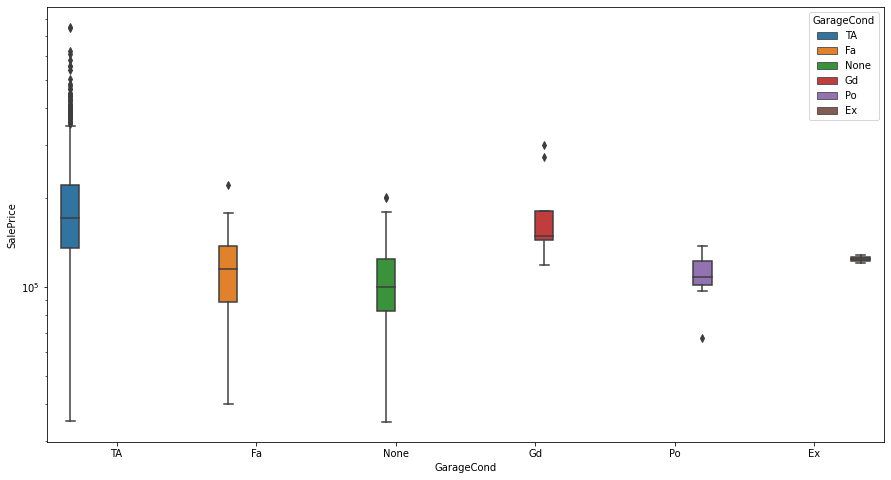

ran


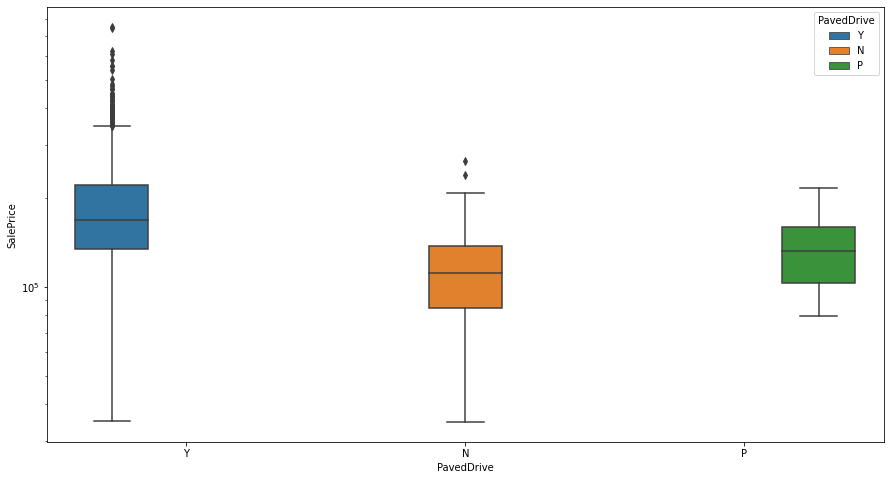

ran


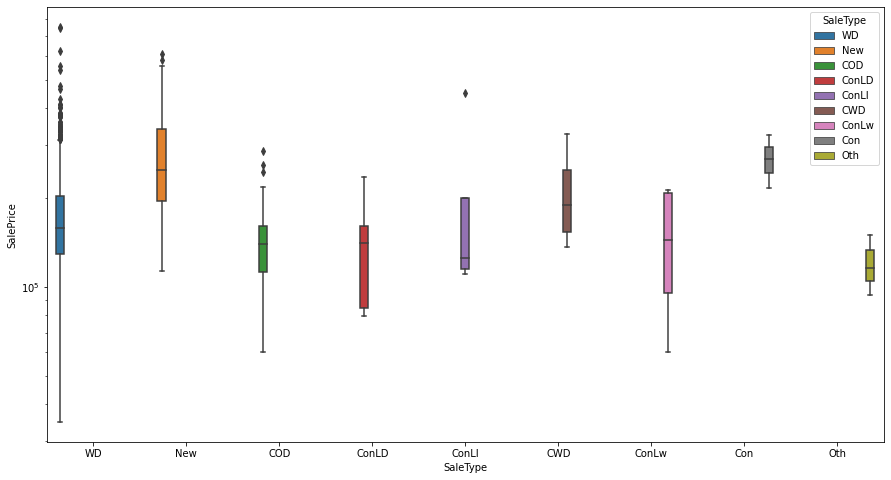

ran


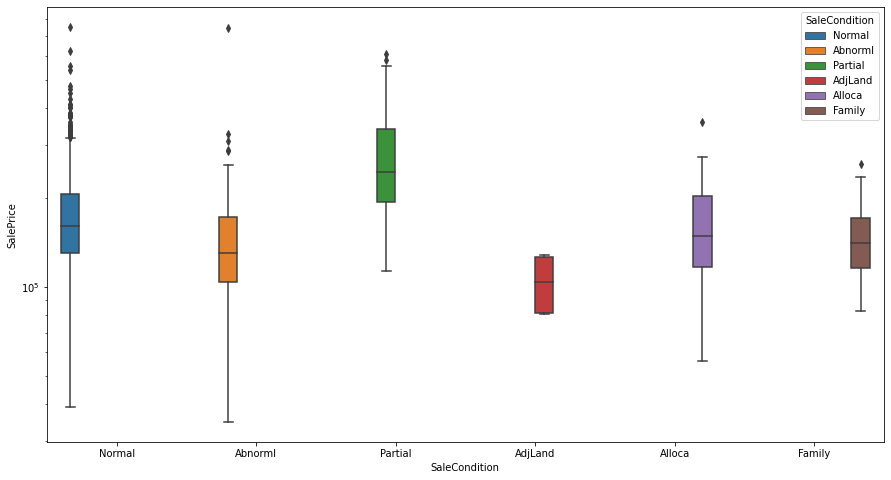

ran


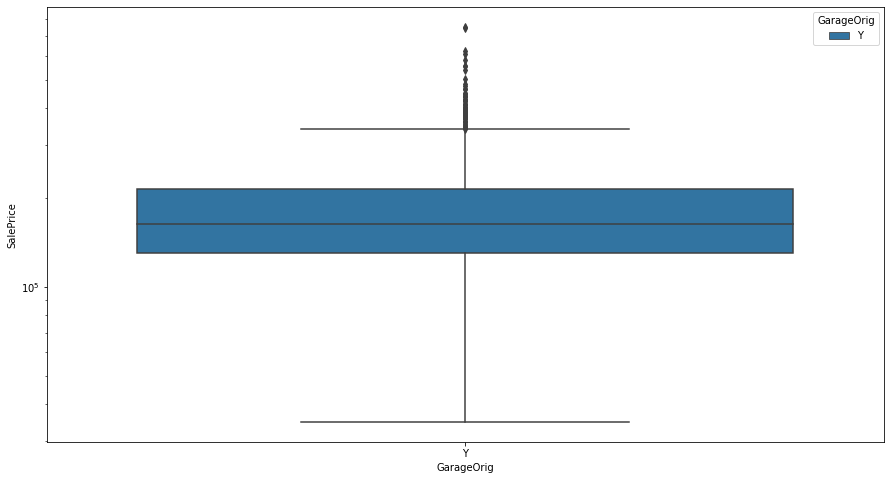

In [72]:
print(df.select_dtypes('object').columns)
for col in df.select_dtypes('object').columns:
    print('ran')
    plt.figure(figsize=(15,8))
    ax=sns.boxplot(x=df[col], y=df['SalePrice'], hue=df[col], data=df[col]).set_yscale('log')
    plt.show()

### Removing columns that don't seem to have much impact on prices given the above box plots.

In [73]:
df.drop(columns=['Utilities', 'LandSlope','LotConfig','RoofStyle', \
                 'RoofMatl','Exterior1st','Exterior2nd','BldgType', \
                 'Electrical','Functional','FireplaceQu','Foundation', \
                 'PavedDrive','SaleType','SaleCondition', 'HeatingQC',\
                 'GarageOrig','GarageQual','GarageCond'], inplace=True)

In [74]:
print(df.shape)
df.info()

(1460, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   object 
 2   MSZoning      1460 non-null   object 
 3   Street        1460 non-null   object 
 4   Alley         1460 non-null   object 
 5   Neighborhood  1460 non-null   object 
 6   Condition1    1460 non-null   object 
 7   Condition2    1460 non-null   object 
 8   HouseStyle    1460 non-null   object 
 9   OverallQual   1460 non-null   int64  
 10  MasVnrType    1460 non-null   object 
 11  MasVnrArea    1460 non-null   float64
 12  ExterQual     1460 non-null   object 
 13  ExterCond     1460 non-null   object 
 14  TotalBsmtSF   1460 non-null   int64  
 15  Heating       1460 non-null   object 
 16  GrLivArea     1460 non-null   int64  
 17  KitchenQual   1460 non-null   object 
 18  GarageType    146

In [75]:
datapath = '../data'
save_file(df, 'house_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/house_data_cleaned.csv"
